In [1]:
from inclearn.lib import results_utils
import tkinter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Naive Fine-tuning

In [2]:
pd.__version__
# # If pandas version is not '1.1.0'
# ! conda install -y pandas='1.1.0'

'1.1.0'

In [3]:
df = pd.read_pickle('assets/stats/stats_cifar100_mobilenetv2_50to100_step5.pkl')
df

,num_classes,num_classes_old,n_epochs,learning_rate,time_epochs,confusion_matrix,class_accuracy,test_accuracy
0,50,50,70,0.2,1182.983366,"{'class_1': [93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'1': 93.0, '2': 90.0, '3': 63.0, '4': 59.0, '...",76.040000
1,60,50,70,0.2,246.010200,"{'class_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': ...",15.000000
2,70,60,70,0.2,246.894926,"{'class_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': ...",12.728571
3,80,70,70,0.2,247.443629,"{'class_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': ...",10.900000
4,90,80,70,0.2,246.946435,"{'class_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': ...",10.066667
5,100,90,70,0.2,246.837553,"{'class_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': ...",9.210000


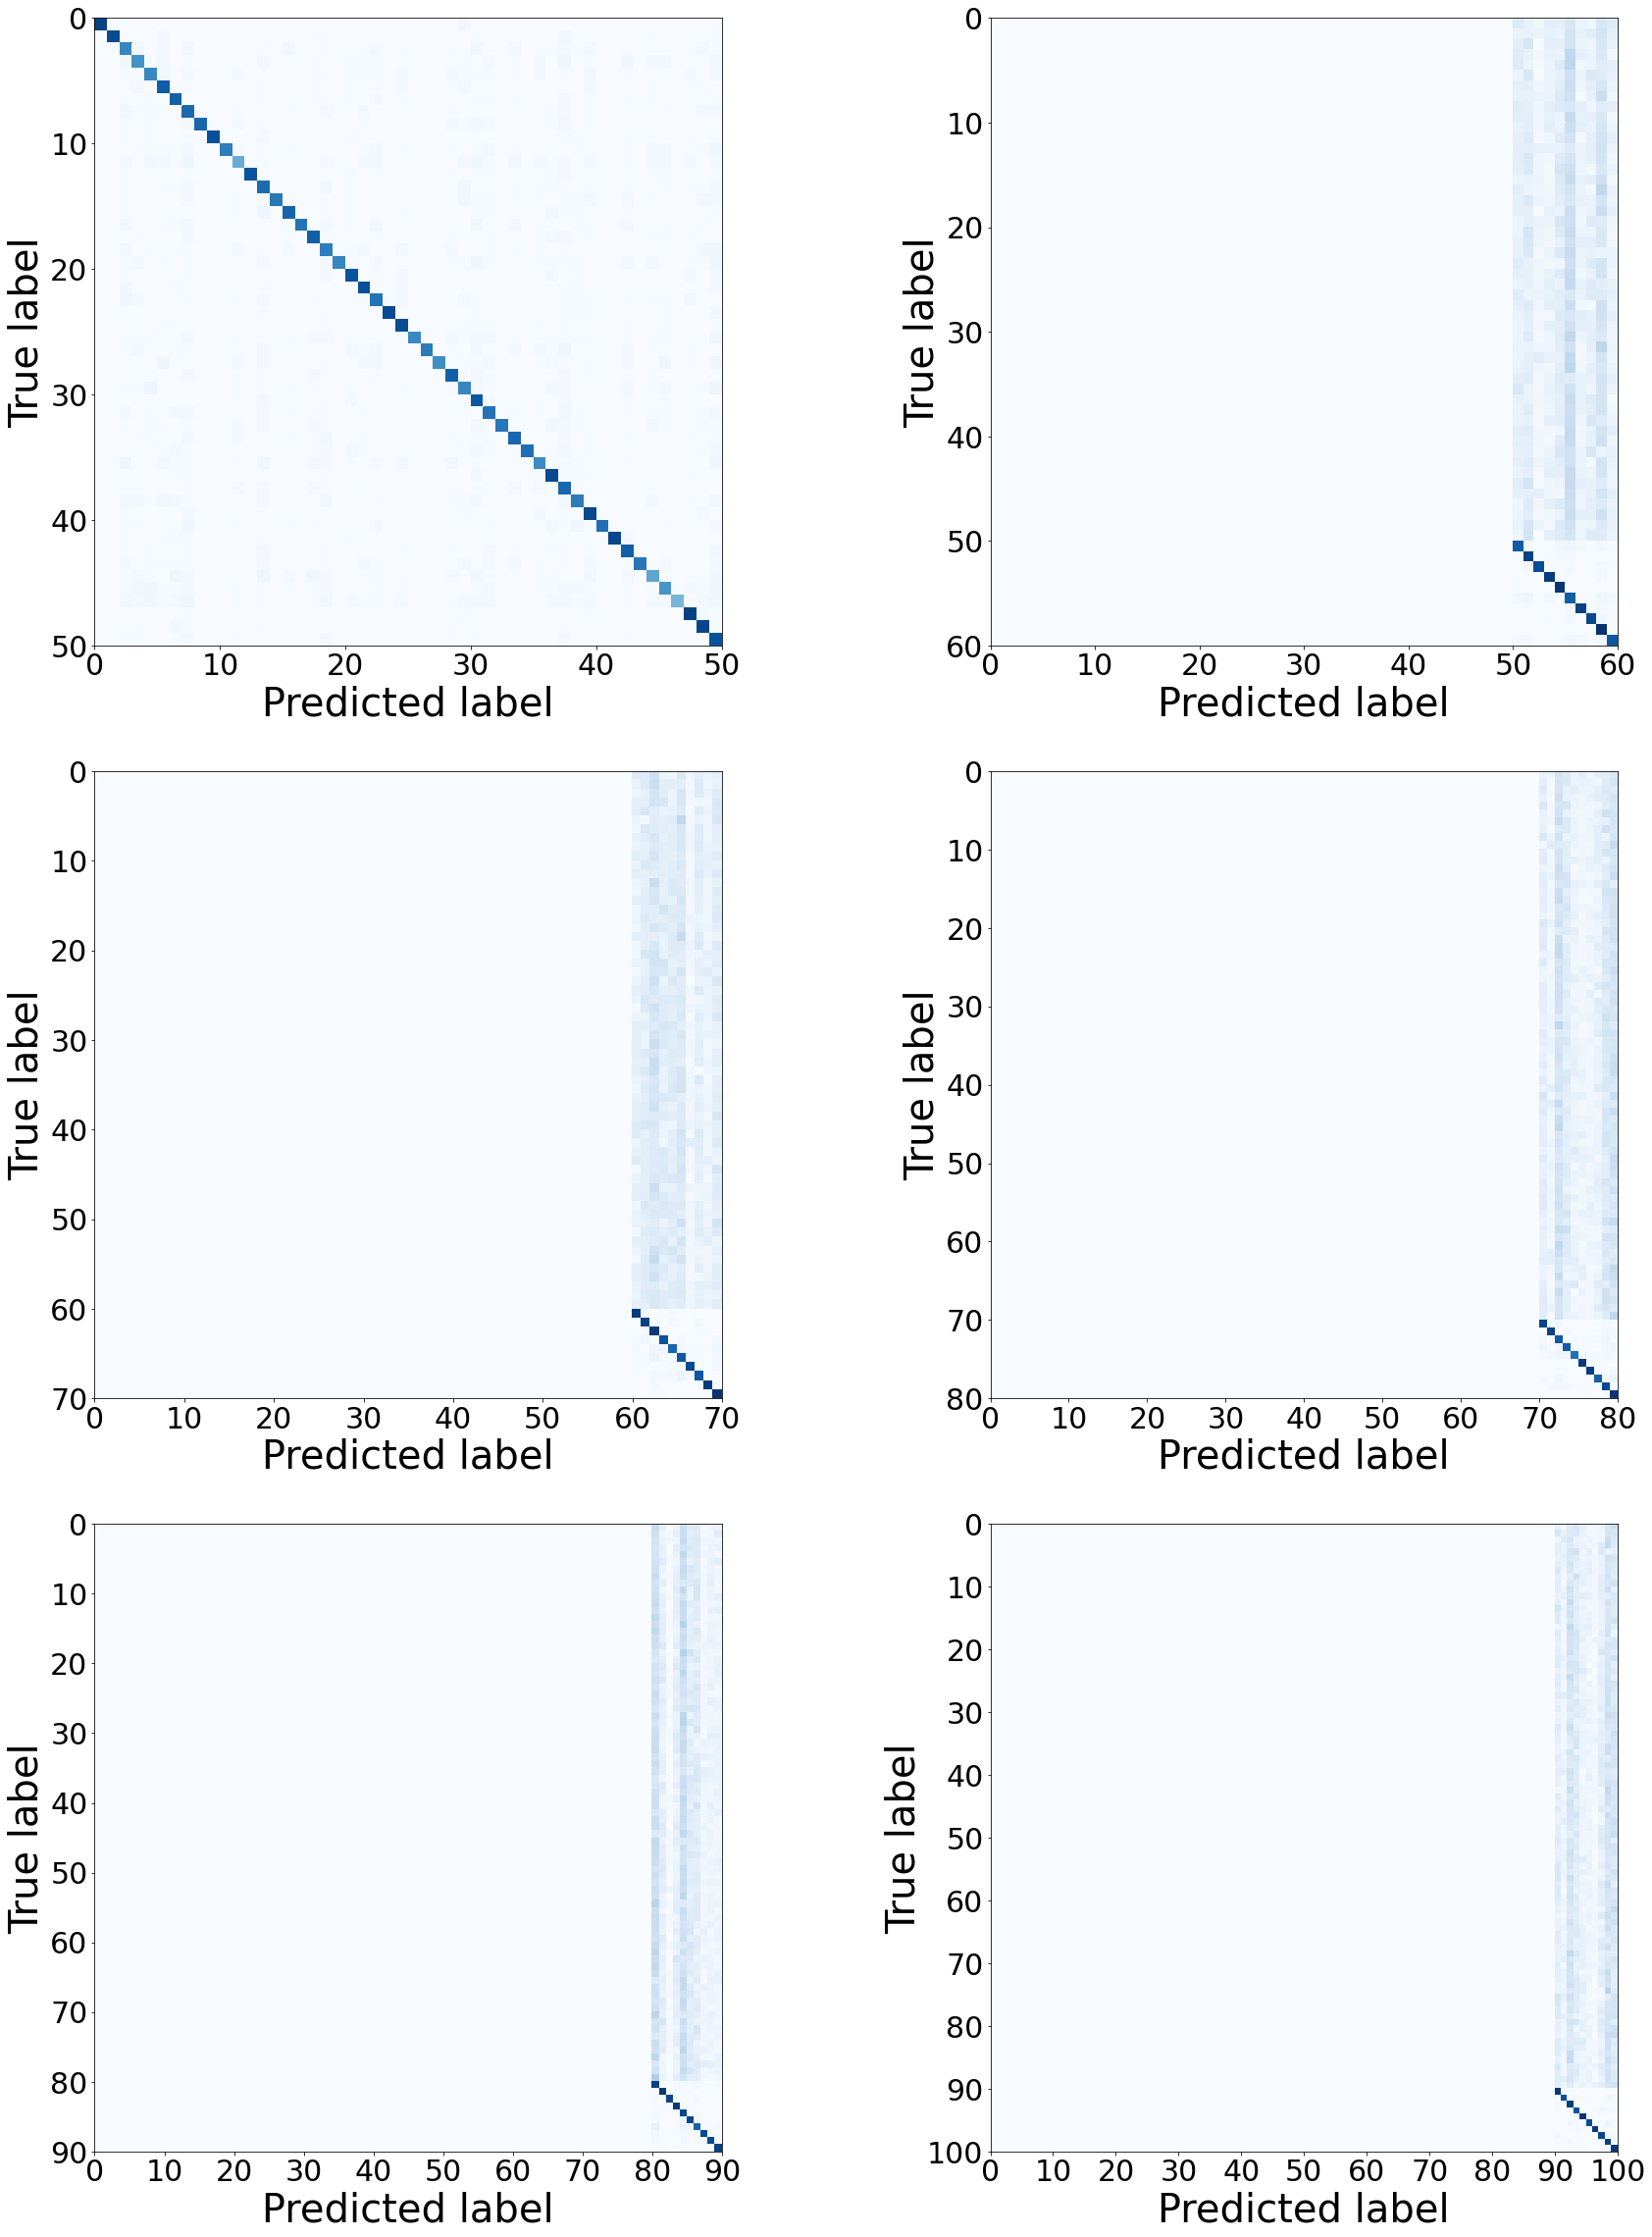

In [4]:
plt.figure(figsize=(30, 40))
for i in range(6):
    conf_mtx = np.array(list(df.iloc[i]['confusion_matrix'].values()))
    
    plt.subplot(3, 2, i+1)

    ax = sns.heatmap(conf_mtx, cbar=False, vmin=0, vmax=100, square=True, cmap="Blues")
    
    ax.set_xticks(range(0, conf_mtx.shape[0]+1, 10))
    ax.set_xticklabels(range(0, conf_mtx.shape[0]+1, 10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(range(0, conf_mtx.shape[0]+1, 10))
    ax.set_yticklabels(range(0, conf_mtx.shape[0]+1, 10))
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_xlabel('Predicted label', fontsize=40)
    ax.set_ylabel('True label', fontsize=40)

    for _, spine in ax.spines.items():
        spine.set_visible(True)

plt.savefig('assets/figures/conf_mtx.png', bbox_inches='tight')

## Incremental Learning Methods

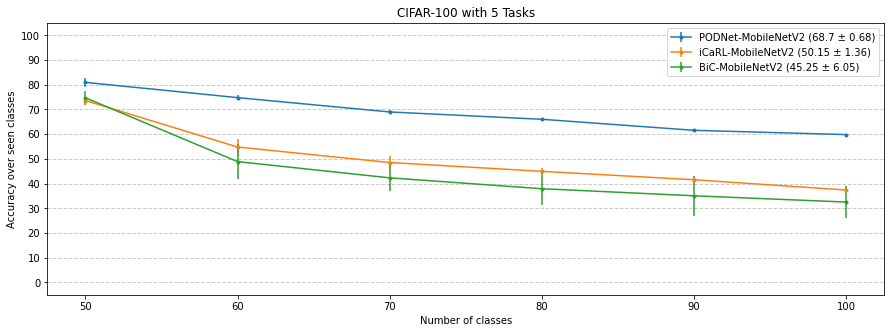

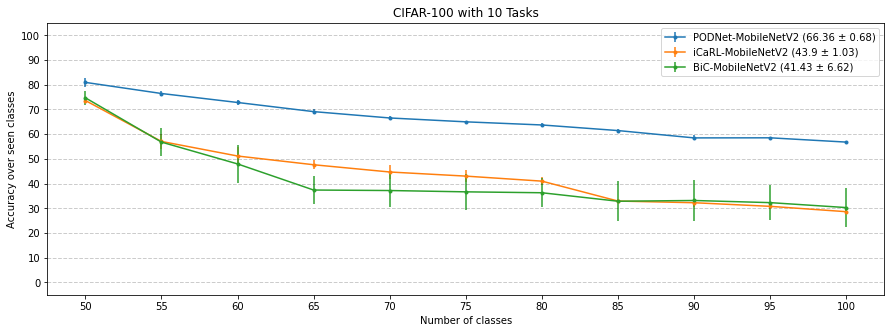

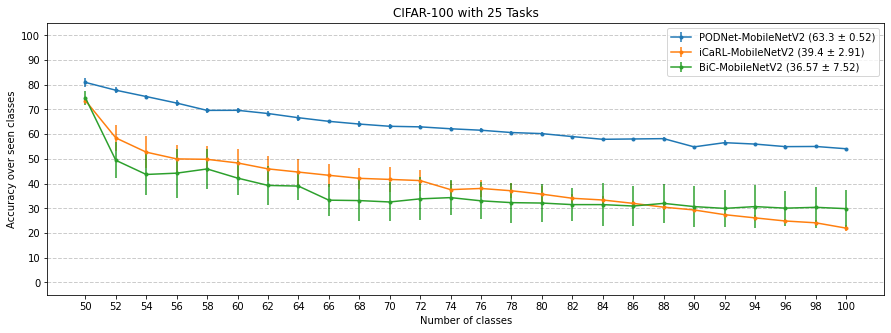

In [5]:
results_lst = [[{'path' : 'assets/results/podnet_cnn_cifar100_5steps_mobilenet/', 
            'label' : 'PODNet-MobileNetV2'},
           {'path' : 'assets/results/icarl_cifar100_5steps_mobilenet/',
            'label' : 'iCaRL-MobileNetV2'},
           {'path' : 'assets/results/bic_cifar100_5steps_mobilenet/',
            'label' : 'BiC-MobileNetV2'}],
            [{'path' : 'assets/results/podnet_cnn_cifar100_10steps_mobilenet/', 
            'label' : 'PODNet-MobileNetV2'},
           {'path' : 'assets/results/icarl_cifar100_10steps_mobilenet/',
            'label' : 'iCaRL-MobileNetV2'},
           {'path' : 'assets/results/bic_cifar100_10steps_mobilenet/',
            'label' : 'BiC-MobileNetV2'}],
            [{'path' : 'assets/results/podnet_cnn_cifar100_25steps_mobilenet/', 
            'label' : 'PODNet-MobileNetV2'},
           {'path' : 'assets/results/icarl_cifar100_25steps_mobilenet/',
            'label' : 'iCaRL-MobileNetV2'},
           {'path' : 'assets/results/bic_cifar100_25steps_mobilenet/',
            'label' : 'BiC-MobileNetV2'}]]
               


increment_lst = [10, 5, 2]
total = 100
initial_increment = 50
title_lst = ['CIFAR-100 with 5 Tasks', 'CIFAR-100 with 10 Tasks', 'CIFAR-100 with 25 Tasks']


for results, increment, title in zip(results_lst, increment_lst, title_lst):
    path_to_save = 'assets/figures/' + title

    results_utils.plot(results,
        increment,
        total,
        initial_increment,
        x_ticks=None,
        title=title,
        path_to_save=path_to_save,
        max_acc=100,
        min_acc=0,
        first_n_steps=None,
        figsize=(15, 5),
        metric="avg_inc",
        zeroshot=False,
        ylabel="Accuracy over seen classes")
